In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Funciones Globales y de errores

In [ ]:
def propagar_suma(x, y, delta_x, delta_y):
  z = x + y
  delta_z = np.sqrt((delta_x) ** 2 + (delta_y) ** 2)

  return [z, delta_z]

def propagar_resta(x, y, delta_x, delta_y):
  z = x - y
  delta_z = np.sqrt((delta_x) ** 2 + (delta_y) ** 2)

  return [z, delta_z]


def propagar_mult(x, y, delta_x, delta_y):
  z = x * y
  delta_z = (x * y) * np.sqrt((delta_x / x) ** 2 + (delta_y / y) ** 2)

  return [z, delta_z]


def propagar_div(x, y, delta_x, delta_y):
  z = x / y
  delta_z = (x / y) * np.sqrt((delta_x / x) ** 2 + (delta_y / y) ** 2)

  return [z, delta_z]


#En radianes
def propagar_cos(x, delta_x):
  z = np.cos(x)
  delta_z = delta_x * np.sin(x)

  return [z, delta_z]


#m es el exponente
def propagar_pot(x, delta_x, m):
  z = x ** m
  delta_z = x ** m * (m * delta_x / x)

  return [z, delta_z]

In [ ]:
def error_abs(error_apreciacion, error_exactitud, error_estadistico, error_definicion):
  error_nom = np.sqrt((error_apreciacion) ** 2 + (error_exactitud) ** 2 + (error_definicion) ** 2)
  error_abs = np.sqrt((error_nom) ** 2 + (error_estadistico) ** 2)

  return error_abs


#Aprepeciacion --> De ver maso la medicion
#Exactitud --> De la calibracion del instrumento
#Definicion --> De la forma del objeto a medir


def error_rel(x, delta_x):
  return delta_x/x


def analisis_error(x, error_apreciacion, error_exactitud, error_estadistico, error_definicion):
  err_abs = error_abs(error_apreciacion, error_exactitud, error_estadistico, error_definicion)
  err_rel = error_rel(x, err_abs)
  err_rel_por = err_rel * 100

  print([x, err_abs])
  print(f'El error absoluto es: {err_abs}')
  print(f'El error relativo es: {err_rel}')
  print(f'El error relativo porcentual es: {err_rel_por}')


def dif_sig(x, y, delta_x, delta_y):
  if np.abs(x - y) <= delta_x + delta_y:
    return 'No hay'
  else:
    return 'Si hay'


#Carga de Datos

Solo cambiar nombre archivo y apretar ejecutar todas. Despues que se ejecuta, revisar que tiene que paracer un csv con los datos. Importante: el archivo de radios tiene que llamarse "Radios_".

In [ ]:
nombre_archivo = 'Latex_15_browniano_0.txt'

In [ ]:
data = pd.read_csv(nombre_archivo, delimiter = ';', skiprows = 2)
radios = pd.read_csv(f'Radios_{nombre_archivo}', delimiter = ';', skiprows = 2)

##Funciones Utiles

In [ ]:
def corregir_valores(data):
  #Los valores obtenidos del tracker tienen notacion cientifica con E pero python la interpreta con e. La funcion cambia E por e
  for column in data.columns:
    data[column] = data[column].astype(str).str.replace(',', '.', regex=False)
    data[column] = pd.to_numeric(data[column], errors='coerce')

##Limpieza y Transfomacion

<p align="justify"> Debido a que los datos del Tracker estan dados en notacion cientifica pero utilizando E, fue necesario aplicar una funcion para transformarlas en e ya que es la manera en que python interpreta esta notacion. Por otra parte, las columnas estan numerados de manera que la primer particula no posee indice numerico pero las $N - 1$ restantes si, del estilo $variable.i$. Por lo tanto, se utilizo el numero $0$ para enumerar a las variables sin numeracion. Por ultimo, para la realizacion del grafico de trayectorias fue necesario normalizarlas de manera que todas comiencen en cero. Las mismas se encuentran en las columnas _norm. Se define la variable global numero de moleculas como n_moleculas.

In [ ]:
cols = radios.columns.tolist()

nuevas_cols = [col + '.0' if '.' not in col else col for col in cols]

cols_con_t = ['t'] + nuevas_cols[1:]

radios.columns = cols_con_t


In [ ]:
cols = data.columns.tolist()

nuevas_cols = [col + '.0' if '.' not in col else col for col in cols]

cols_con_t = ['t'] + nuevas_cols[1:]

data.columns = cols_con_t




---



**IMPORTANTE:** Numero de moleculas calculado directo del DataFrame

In [ ]:
j = ''

for i in range(1, len(cols[-2])):
  j += cols[-2][-i]
  if cols[-2][-i] == '.':
    break

n_moleculas = 0

if len(j) > 2:
  n_moleculas = int(j[1::-1]) + 1
else:
  n_moleculas = int(j[0]) + 1


n_moleculas

9



---



In [ ]:
data.columns

Index(['t', 'x.0', 'y.0', 'x.1', 'y.1', 'x.2', 'y.2', 'x.3', 'y.3', 'x.4',
       'y.4', 'x.5', 'y.5', 'x.6', 'y.6', 'x.7', 'y.7', 'x.8', 'y.8',
       'Unnamed: 19.0'],
      dtype='object')

In [ ]:
corregir_valores(data)
corregir_valores(radios)

In [ ]:
data.ffill(inplace=True)
data.bfill(inplace=True)
data.fillna(0)

,t,x.0,y.0,x.1,y.1,x.2,y.2,x.3,y.3,x.4,y.4,x.5,y.5,x.6,y.6,x.7,y.7,x.8,y.8,Unnamed: 19.0
0,0.000000,0.000069,-0.000050,0.000077,-0.000071,-0.000018,-0.000060,-0.000012,-0.000026,0.000037,-0.000052,0.000084,-0.000031,0.000038,-0.000078,0.000004,0.000009,0.000077,0.000011,0.0
1,0.066662,0.000069,-0.000050,0.000077,-0.000071,-0.000018,-0.000060,-0.000011,-0.000026,0.000037,-0.000052,0.000084,-0.000031,0.000038,-0.000078,0.000004,0.000009,0.000077,0.000011,0.0
2,0.133324,0.000069,-0.000050,0.000077,-0.000071,-0.000017,-0.000061,-0.000012,-0.000026,0.000037,-0.000052,0.000084,-0.000031,0.000038,-0.000078,0.000004,0.000009,0.000077,0.000011,0.0
3,0.199987,0.000069,-0.000050,0.000077,-0.000071,-0.000017,-0.000061,-0.000012,-0.000027,0.000037,-0.000052,0.000084,-0.000031,0.000038,-0.000078,0.000004,0.000009,0.000077,0.000011,0.0
4,0.266649,0.000069,-0.000050,0.000077,-0.000071,-0.000017,-0.000061,-0.000012,-0.000027,0.000037,-0.000052,0.000084,-0.000031,0.000038,-0.000077,0.000004,0.000009,0.000077,0.000011,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,67.528830,0.000067,-0.000055,0.000070,-0.000071,-0.000022,-0.000069,-0.000013,-0.000030,0.000037,-0.000049,0.000079,-0.000029,0.000032,-0.000086,0.000002,0.000005,0.000074,0.000009,0.0
1014,67.595490,0.000067,-0.000055,0.000070,-0.000071,-0.000022,-0.000069,-0.000013,-0.000030,0.000037,-0.000049,0.000079,-0.000029,0.000032,-0.000086,0.000002,0.000005,0.000074,0.000009,0.0
1015,67.662160,0.000067,-0.000055,0.000070,-0.000072,-0.000022,-0.000068,-0.000013,-0.000029,0.000037,-0.000050,0.000079,-0.000029,0.000032,-0.000086,0.000002,0.000005,0.000074,0.000009,0.0
1016,67.728820,0.000067,-0.000055,0.000070,-0.000072,-0.000022,-0.000068,-0.000012,-0.000029,0.000037,-0.000049,0.000079,-0.000028,0.000032,-0.000086,0.000002,0.000005,0.000074,0.000009,0.0


##Conversion de unidad

Los dataframes estan en $\mu m$

In [ ]:
multiplicador = 1e6

columnas_a_multiplicar = data.columns[1:]


data[columnas_a_multiplicar] = data[columnas_a_multiplicar] * multiplicador

In [ ]:
columnas_a_multiplicar = radios.columns[1:]

radios[columnas_a_multiplicar] = radios[columnas_a_multiplicar] * multiplicador


Defino i_norm que referie a las columnas x e y i-esima comenzando en cero

In [ ]:
for i in range(0, n_moleculas):


  data[f'x.{i}_norm'] = (data[f'x.{i}'].values - data[f'x.{i}'][0])
  data[f'y.{i}_norm'] = (data[f'y.{i}'].values - data[f'y.{i}'][0])

In [ ]:
data.isna()

,t,x.0,y.0,x.1,y.1,x.2,y.2,x.3,y.3,x.4,...,x.4_norm,y.4_norm,x.5_norm,y.5_norm,x.6_norm,y.6_norm,x.7_norm,y.7_norm,x.8_norm,y.8_norm
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1014,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1016,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.shape

(1018, 38)

In [ ]:
len(data)

1018

#Analisis


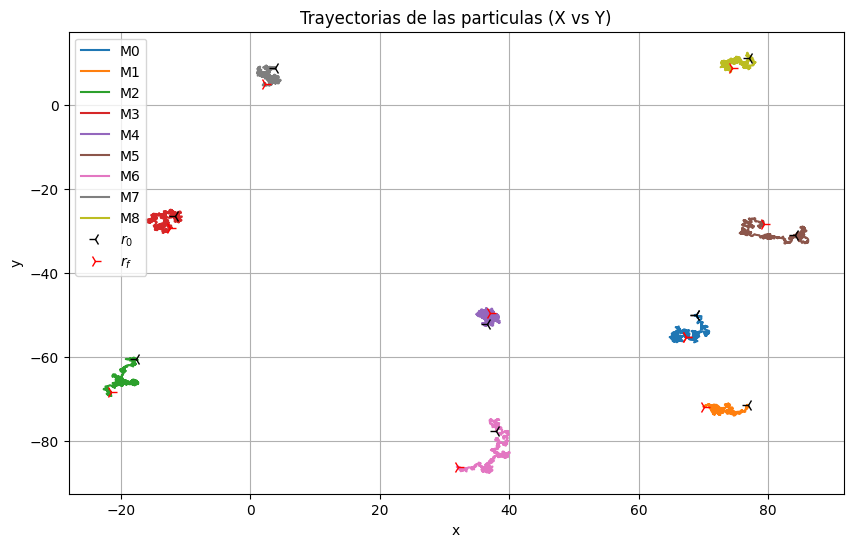

In [ ]:
#Visualizamos las trayectorias en un grafico espacial bidimensional
plt.figure(figsize=(10, 6))

for i in range(0, n_moleculas):

  plt.plot(data[f'x.{i}'], data[f'y.{i}'], label=f'M{i}')
  plt.plot(data[f'x.{i}'][0], data[f'y.{i}'][0], 'k3', markersize = 9)
  plt.plot(data[f'x.{i}'].tail(1), data[f'y.{i}'].tail(1), 'r4', markersize = 9)


plt.plot(data[f'x.0'][0], data[f'y.0'][0], 'k3', markersize = 9, label = '$r_0$')
plt.plot(data[f'x.0'].tail(1), data[f'y.0'].tail(1), 'r4', markersize = 9, label = '$r_f$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Trayectorias de las particulas (X vs Y)')
plt.legend()
plt.grid(True)
plt.show()

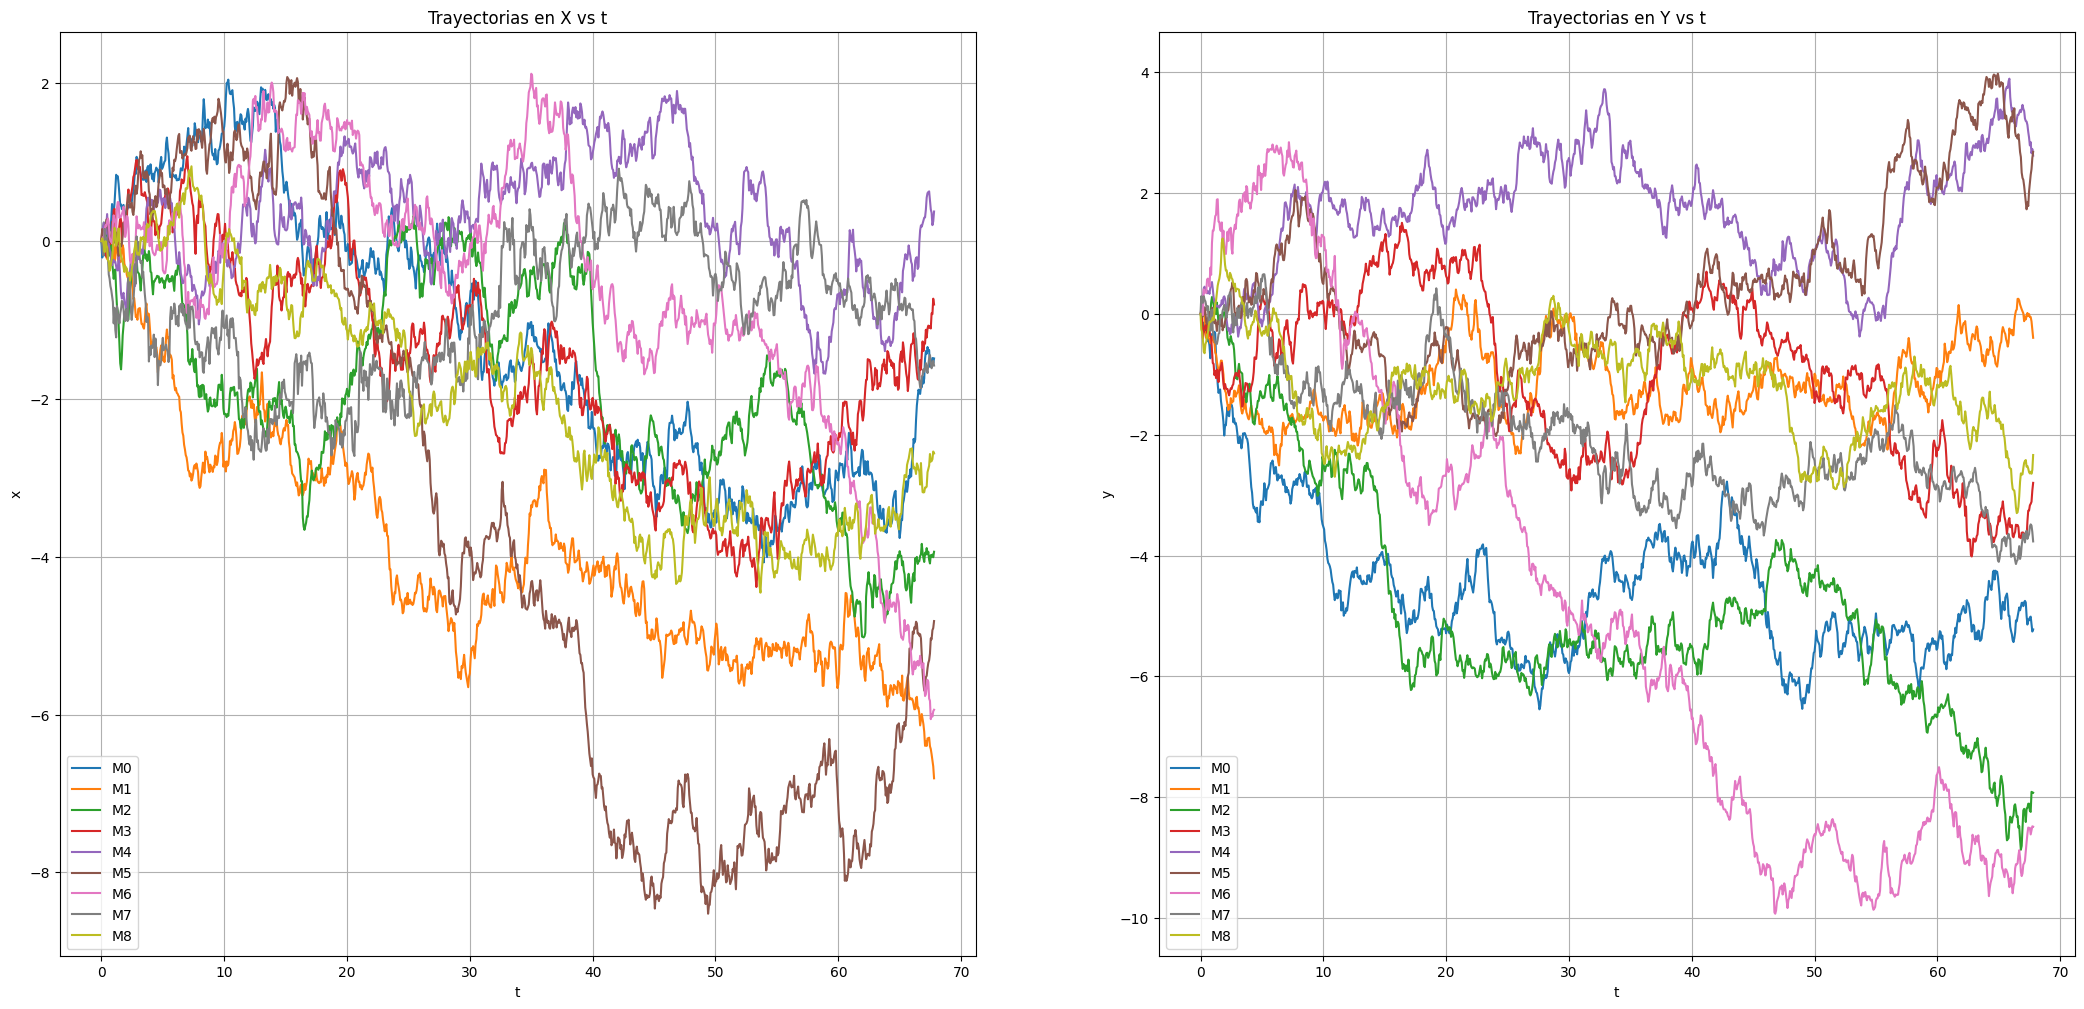

In [ ]:
#Graficamos la evolucion temporal de cada particula con mismo origen para observar la desviacion de cada una

fig, ax = plt.subplots(1, 2, figsize=(26, 12))

for i in range(0, n_moleculas):
  ax[0].plot(data['t'], data[f'x.{i}_norm'], label=f'M{i}')
  ax[1].plot(data['t'], data[f'y.{i}_norm'], label=f'M{i}')

ax[0].set_xlabel('t')
ax[0].set_ylabel('x')
ax[0].set_title('Trayectorias en X vs t')
ax[0].legend()
ax[0].grid(True)
ax[1].set_ylabel('y')
ax[1].set_xlabel('t')
ax[1].set_title('Trayectorias en Y vs t')
ax[1].legend()
ax[1].grid(True)


plt.show()

##Velocidad de Deriva

Para observar si hay presencia de deriva en los datos, realizamos un ajuste lineal sobre el promedio de los desplazamientos en x e y. De esta manera si $\langle X_n \rangle \neq 0$, para distintas ventanas podremos obtener la velocidad de deriva.

In [ ]:
from scipy.optimize import curve_fit



#Defino las series de datos sumando y promediando el total
data['promedio_x'] = np.zeros(len(data))
data['promedio_y'] = np.zeros(len(data))



for i in range(0, n_moleculas):
  data['promedio_x'] += data[f'x.{i}_norm']
  data['promedio_y'] += data[f'y.{i}_norm']


data['promedio_x'] = data['promedio_x']/n_moleculas
data['promedio_y'] = data['promedio_y']/n_moleculas

#Defino la funcion a ajustar
def ajuste_lineal(x, a, b):
    return a * x + b


popt_x, pcov_x = curve_fit(ajuste_lineal, data['t'], data['promedio_x'])
popt_y, pcov_y = curve_fit(ajuste_lineal, data['t'], data['promedio_y'])


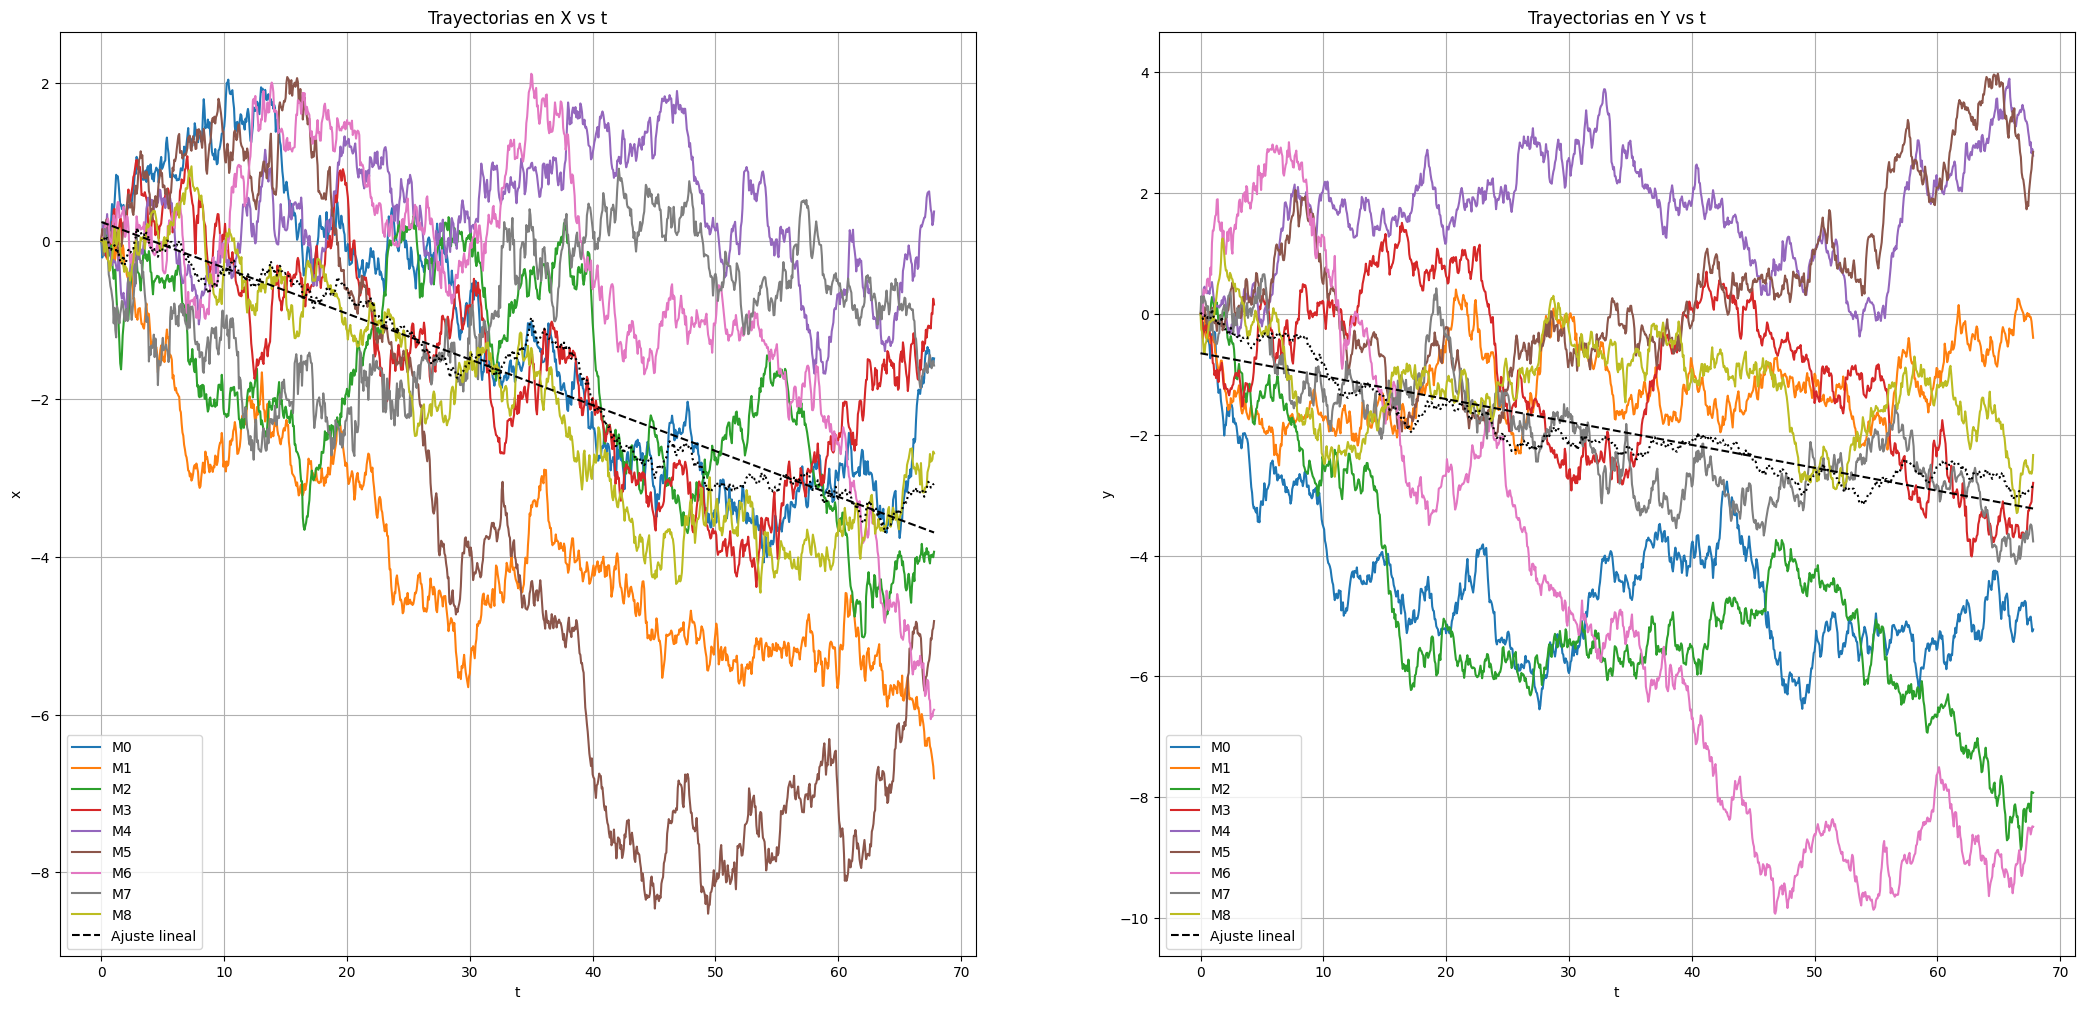

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(26, 12))

for i in range(0, n_moleculas):
  ax[0].plot(data['t'], data[f'x.{i}_norm'], label=f'M{i}')
  ax[1].plot(data['t'], data[f'y.{i}_norm'], label=f'M{i}')

ax[0].plot(data['t'], data['promedio_x'], 'k:', label='')
ax[1].plot(data['t'], data['promedio_y'], 'k:', label='')

ax[0].set_xlabel('t')
ax[0].set_ylabel('x')
ax[0].set_title('Trayectorias en X vs t')
ax[0].legend()
ax[0].grid(True)
ax[1].set_ylabel('y')
ax[1].set_xlabel('t')
ax[1].set_title('Trayectorias en Y vs t')
ax[1].legend()
ax[1].grid(True)

ax[1].plot(data['t'], ajuste_lineal(data['t'], *popt_y), 'k--', label='Ajuste lineal')
ax[1].legend()
ax[0].plot(data['t'], ajuste_lineal(data['t'], *popt_x), 'k--', label='Ajuste lineal')
ax[0].legend()

plt.show()

In [ ]:
V_x = popt_x[0]
V_y = popt_y[0]

V_x_error = np.sqrt(pcov_x[0, 0])
V_y_error = np.sqrt(pcov_y[0, 0])

print(f"Velocidad de Deriva en X: {V_x:.4f} ± {V_x_error}")
print(f"Velocidad de Deriva en Y: {V_y:.4f} ± {V_y_error}")

Velocidad de Deriva en X: -0.0580 ± 0.00043958405919537915
Velocidad de Deriva en Y: -0.0379 ± 0.0005227980997292454


###Restar la deriva para usar MSD Browniano

In [ ]:
for i in range(0, n_moleculas):
  data[f'x.{i}_norm'] = data[f'x.{i}_norm'] - ajuste_lineal(data['t'], *popt_x)
  data[f'y.{i}_norm'] = data[f'y.{i}_norm'] - ajuste_lineal(data['t'], *popt_y)

##MSD



---


Analizamos el desplazamiento medio cuadratico $DMC(t)$ para ello es necesario considerar $t = \tau n$ donde $\tau$ representa el tiempo de restraso (lag time)


In [ ]:
#Definimos la funcion MSD para calcular el desplazamiento medio cuadratico. En este caso lag_time es una medida de n

def MSD(x, y, max_lag_time):

  N = len(x)
  msd = np.zeros(max_lag_time)

  for dt in range(1, max_lag_time + 1):
    squared_displacements = []
    for i in range(N - dt):
      dx = x[i + dt] - x[i]
      dy = y[i + dt] - y[i]
      squared_displacements.append(dx**2 + dy**2)
    msd[dt - 1] = np.mean(squared_displacements)

  return pd.Series(msd)




---



IMPORTANTE: Se agrego un factor para adaptar el eje x de lag time a tiempo en segs



---



Para realizar el ajuste sobre el MSD promedio del ensamble calculamos las columnas msd y la columna msd promedio para distintos tiempos de retardo (lag_time) para asi obtener distintos D

In [ ]:
from scipy.optimize import curve_fit

def msd_libre(t, D):
  return 4 * D * t


In [ ]:
factores_tiempo = [3, 4, 5, 6, 7, 8, 9, 10]

lags = [len(data)/i for i in factores_tiempo]



def calcular_msd(data, factores):
  lags = [len(data)/i for i in factores]

  for factor in factores:
    max_lag_time = int(len(data)/factor)
    lag_times = data['t'][:max_lag_time]

    data[f'msd_promedio_{factor}'] = np.zeros(len(data))

    for i in range(0, n_moleculas):
      data[f'msd.{i}_{factor}'] = MSD(data[f'x.{i}_norm'].values, data[f'y.{i}_norm'].values, max_lag_time)
      data.loc[:max_lag_time, f'msd_promedio_{factor}'] += data[f'msd.{i}_{factor}'].loc[:max_lag_time]

    data[f'msd_promedio_{factor}'] = data[f'msd_promedio_{factor}']/n_moleculas


calcular_msd(data, factores_tiempo)

/tmp/ipython-input-2650297900.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'msd_promedio_{factor}'] = np.zeros(len(data))
/tmp/ipython-input-2650297900.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'msd.{i}_{factor}'] = MSD(data[f'x.{i}_norm'].values, data[f'y.{i}_norm'].values, max_lag_time)
/tmp/ipython-input-2650297900.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

Esto es para graficar el msd_n que uno quiera

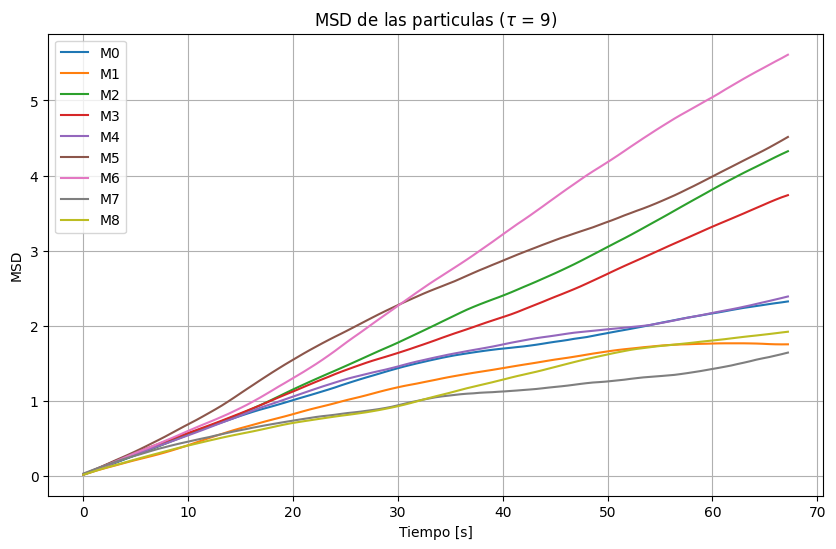

In [ ]:
n_del_msd = 9

plt.figure(figsize=(10, 6))

max_lag_time = int(len(data)/n_del_msd)
lag_times = data['t'][:max_lag_time]

for i in range(0, n_moleculas):
  plt.plot(data['t'][:max_lag_time] * n_del_msd, data[f'msd.{i}_{n_del_msd}'][:max_lag_time], label = f'M{i}')


plt.xlabel('Tiempo [s]')
plt.ylabel('MSD')
plt.title(fr'MSD de las particulas ($\tau$ = {n_del_msd})')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
ajustes_msd = pd.DataFrame()

for factor in factores_tiempo:
  max_lag_time = int(len(data)/factor)
  lag_times = data['t'][:max_lag_time]

  #

  popt_msd, pcov_msd = curve_fit(msd_libre, lag_times * factor, data[f'msd_promedio_{factor}'][:max_lag_time], p0=[data[f'msd_promedio_{factor}'][:max_lag_time].mean()])
  D = popt_msd[0]
  D_error = np.sqrt(pcov_msd[0, 0])

  ajustes_msd.loc[factor, 'D'] = D
  ajustes_msd.loc[factor, 'D_error'] = D_error
  ajustes_msd.loc[factor, 'Factor_tiempo'] = factor


ajustes_msd


,D,D_error,Factor_tiempo
3,0.032073,0.000089,3.0
4,0.025251,0.000063,4.0
5,0.020857,0.000040,5.0
6,0.017566,0.000041,6.0
7,0.015187,0.000044,7.0
8,0.013461,0.000043,8.0
9,0.012115,0.000041,9.0
10,0.011043,0.000038,10.0


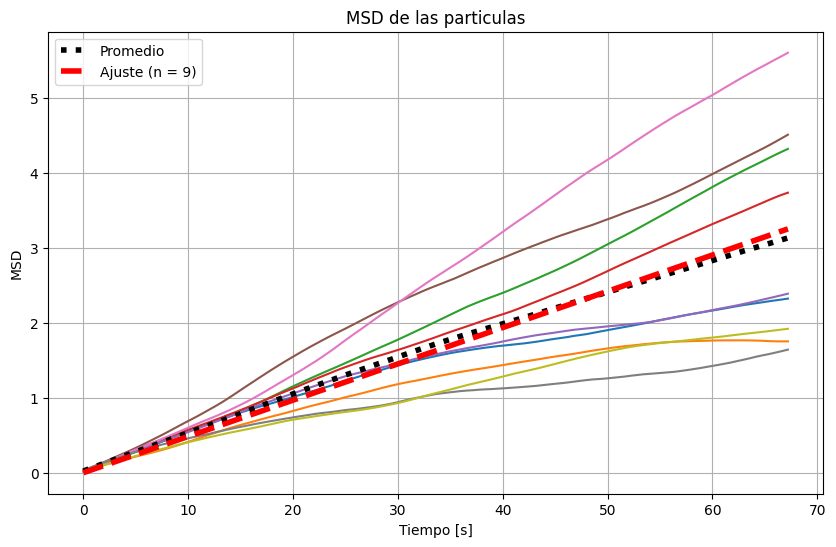

In [ ]:
n_del_msd = 9

plt.figure(figsize=(10, 6))

max_lag_time = int(len(data)/n_del_msd) # Este es el tau de retraso
lag_times = data['t'][:max_lag_time]

for i in range(0, n_moleculas):
  plt.plot(lag_times * n_del_msd, data[f'msd.{i}_{n_del_msd}'][:max_lag_time])


plt.title('MSD de las particulas')
plt.plot(lag_times* n_del_msd, data[f'msd_promedio_{n_del_msd}'][:max_lag_time], ':k',label='Promedio', linewidth = 4)
plt.plot(lag_times* n_del_msd, msd_libre(lag_times* n_del_msd , ajustes_msd[ajustes_msd['Factor_tiempo'] == n_del_msd]['D'].values), 'r--', label=f'Ajuste (n = {n_del_msd})', linewidth = 4)

plt.xlabel('Tiempo [s]')
plt.ylabel('MSD')
plt.title('MSD de las particulas')
plt.grid(True)
plt.legend()
plt.show()

Para el calculo de D promediamos sobre todos los D provenientes de los distintos lag_times considerados

In [ ]:
D_mean = ajustes_msd['D'].mean()
D_median = ajustes_msd['D'].median()

print(f"Coeficiente de Difusion (D) promedio: {D_mean:.4f}")
print(f"Coeficiente de Difusion (D) mediana: {D_median:.4f}")
D_error_mean = ajustes_msd['D_error'].mean()

print(f"Coeficiente de Difusion (D) promedio: {D_mean:.4f} ± {D_error_mean}")

Coeficiente de Difusion (D) promedio: 0.0184
Coeficiente de Difusion (D) mediana: 0.0164
Coeficiente de Difusion (D) promedio: 0.0184 ± 4.989835626532073e-05


##Coeficiente de Viscosidad

In [ ]:
def calcular_eta(D, D_error, k_B, k_B_error, radio, radio_error, T, T_error):
  num = propagar_mult(k_B, T, k_B_error, T_error)
  denom_aux = propagar_mult(D, radio, D_error, radio_error)
  denom_fin = [denom_aux[0] *  6*np.pi, denom_aux[1]]

  res = propagar_div(num[0], denom_fin[0], num[1], denom_fin[1])

  return res

In [ ]:
#vector de radios

etas = pd.DataFrame()

radios_prom = [float(np.mean(radios[col])) for col in radios.columns if 'R.' in col]

etas['radios_prom_particula'] = radios_prom

T = 303
T_error = 1

k_B = 1.380649e-11 # K_B en micrometros
k_B_error = 0.000002e-11


etas

,radios_prom_particula
0,2.205791
1,2.973503
2,2.183866
3,2.283700
4,2.247781
5,2.837421
6,2.263763
7,2.826405
8,1.591618


In [ ]:
for particula in range(0, n_moleculas):
  etas.loc[particula, 'eta_particula'] = calcular_eta(D_mean, D_error_mean, k_B, k_B_error, radios_prom[particula], np.std(radios_prom), T, T_error)[0]
  etas.loc[particula, 'eta_error'] = calcular_eta(D_mean, D_error_mean, k_B, k_B_error, radios_prom[particula], np.std(radios_prom), T, T_error)[1]


etas

,radios_prom_particula,eta_particula,eta_error
0,2.205791,5.455052e-09,5.636628e-11
1,2.973503,4.046643e-09,3.228728e-11
2,2.183866,5.509818e-09,5.744559e-11
3,2.283700,5.268951e-09,5.277882e-11
4,2.247781,5.353148e-09,5.438655e-11
5,2.837421,4.240719e-09,3.518567e-11
6,2.263763,5.315355e-09,5.366177e-11
7,2.826405,4.257247e-09,3.543869e-11
8,1.591618,7.560045e-09,1.055752e-10


In [ ]:
eta_mean = etas['eta_particula'].mean()
eta_error = etas['eta_error'].mean()

print(f"Coeficiente de Viscosidad promedio: {eta_mean:.4e} + {eta_error:.4e}")

Coeficiente de Viscosidad promedio: 5.2230e-09 + 5.3681e-11


Esto es en micrometros para pasar a Pa.s hay que multiplicar por $10^6$

#Exportar datos

In [ ]:
datos_exportar_dic = {
    'Variable': ['Coeficiente de difusion(D)', 'Viscocidad (eta)', 'Deriva x', 'Deriva y'],
    'Valor': [D_mean, eta_mean, V_x, V_y],
    'Error': [D_error_mean, eta_error, V_x_error, V_y_error],
    'Unidad': ['µm²/s', 'Pa·s', 'µm/s', 'µm/s']
}

datos_exportar = pd.DataFrame(datos_exportar_dic)
datos_exportar.to_csv(f'datos_browniano_{nombre_archivo}', index=False)

#Figuras utilizdas en el Informe

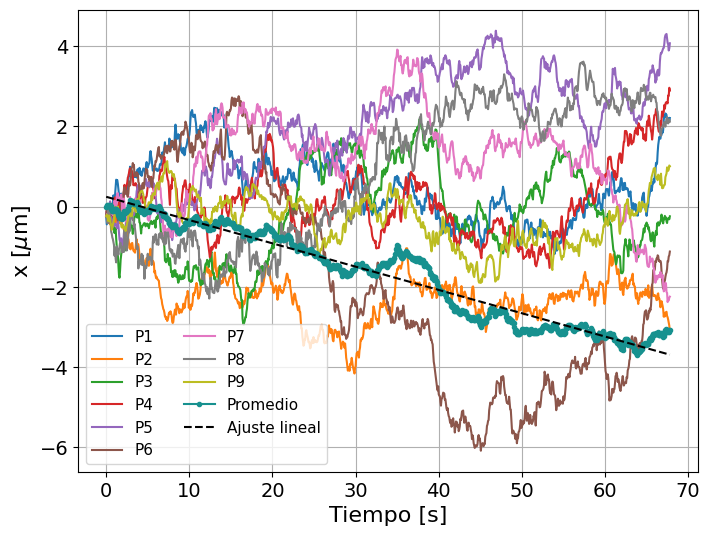

In [ ]:
plt.figure(figsize=(8,6))

for i in range(0, n_moleculas):
  plt.plot(data['t'], data[f'x.{i}_norm'], label=f'P{i + 1}')


plt.plot(data['t'], data['promedio_x'], '.-', color = '#17918F',label='Promedio')
plt.plot(data['t'], ajuste_lineal(data['t'], *popt_x), 'k--', label='Ajuste lineal')
plt.xlabel('Tiempo [s]', fontsize = 16)
plt.ylabel(r'x [$\mu$m]', fontsize = 16)
plt.legend(ncols = 2, fontsize = 11)
plt.grid(True)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('Trayectoria_x_15.png')

plt.show()

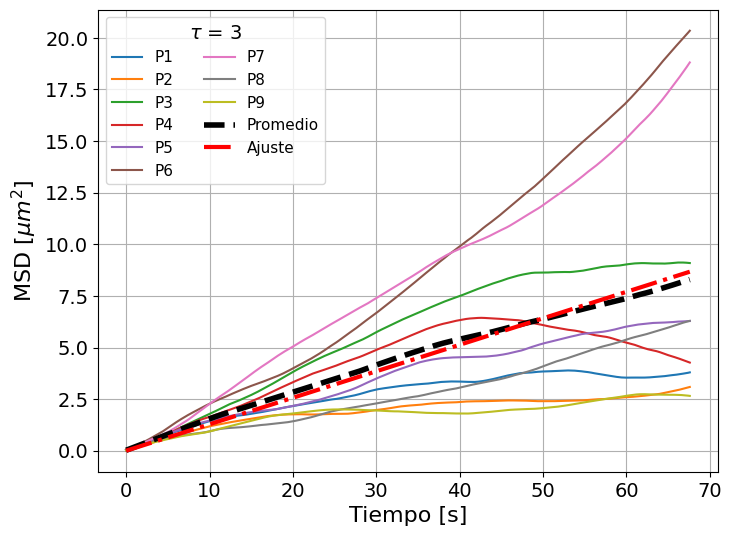

In [ ]:
n_del_msd = 3
plt.rcParams['legend.title_fontsize'] = 14

plt.figure(figsize=(8, 6))

max_lag_time = int(len(data)/n_del_msd) # Este es el tau de retraso
lag_times = data['t'][:max_lag_time]


for i in range(0, n_moleculas):
  plt.plot(lag_times * n_del_msd, data[f'msd.{i}_{n_del_msd}'][:max_lag_time], label = f'P{i + 1}')


plt.plot(lag_times* n_del_msd, data[f'msd_promedio_{n_del_msd}'][:max_lag_time], '--k',label='Promedio', linewidth = 4)
plt.plot(lag_times* n_del_msd, msd_libre(lag_times* n_del_msd , ajustes_msd[ajustes_msd['Factor_tiempo'] == n_del_msd]['D'].values), 'r-.', label=f'Ajuste', linewidth = 3)





plt.xlabel('Tiempo [s]', fontsize = 16)
plt.ylabel(r'MSD [$\mu m^{2}$]', fontsize = 16)

plt.grid(True)
plt.legend(ncols = 2, title = rf'$\tau$ = {n_del_msd}', fontsize = 11)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('msd_tau=3_15.png')

plt.show()